In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import requests
import ftplib
import io 


##### Yahoo finans verileri kullanarak ASELSAN tarihi fiyat serisini ilgili aynı periyot için dolar/tl bazında değişimini yapacağız bunun için ilgili periyot için dolar/tl verilerini de çekmemiz gerekli 

In [168]:
historical = yf.Ticker("ASELS.IS")
df = historical.history(period="1d", start="2019-01-01", end="2020-12-31")

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 511 entries, 2019-01-01 00:00:00+03:00 to 2020-12-30 00:00:00+03:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          511 non-null    float64
 1   High          511 non-null    float64
 2   Low           511 non-null    float64
 3   Close         511 non-null    float64
 4   Volume        511 non-null    int64  
 5   Dividends     511 non-null    float64
 6   Stock Splits  511 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 31.9 KB


In [170]:
df.index = df.index.date # datetime indexinde sadece tarih formatını istiyoruz çünkü ilgili periyottaki kur verisi ile ortak index atıyoruz.
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-01-01,5.678549,5.678549,5.678549,5.678549,0,0.0,0.0
2019-01-02,5.664446,5.664446,5.523423,5.532825,26978636,0.0,0.0
2019-01-03,5.499918,5.551627,5.307186,5.330690,44982876,0.0,0.0
2019-01-04,5.363596,5.410604,5.321289,5.396502,36670996,0.0,0.0
2019-01-07,5.434108,5.457612,5.377698,5.387100,29798540,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-24,8.748832,8.845987,8.743974,8.763406,80451136,0.0,0.0
2020-12-25,8.782836,8.831414,8.719685,8.748832,42809676,0.0,0.0
2020-12-28,8.792552,8.797410,8.743974,8.753690,26191262,0.0,0.0
2020-12-29,8.763406,8.773121,8.641962,8.695396,44879544,0.0,0.0


In [171]:
dolar_tl_kuru = yf.Ticker("USDTRY=X")

kur_verisi = dolar_tl_kuru.history(period="1d", start="2019-01-01", end="2020-12-31")

print(kur_verisi)

                              Open     High      Low   Close  Volume   
Date                                                                   
2019-01-01 00:00:00+00:00  5.28730  5.28850  5.28400  5.2700       0  \
2019-01-02 00:00:00+00:00  5.28890  5.41150  5.28092  5.2887       0   
2019-01-03 00:00:00+00:00  5.50620  5.57180  5.40090  5.5153       0   
2019-01-04 00:00:00+00:00  5.47020  5.47020  5.33383  5.4722       0   
2019-01-07 00:00:00+00:00  5.32810  5.40870  5.31917  5.3270       0   
...                            ...      ...      ...     ...     ...   
2020-12-24 00:00:00+00:00  7.63279  7.67030  7.54750  7.6333       0   
2020-12-25 00:00:00+00:00  7.57760  7.58715  7.53880  7.5741       0   
2020-12-28 00:00:00+00:00  7.57982  7.57982  7.40330  7.5695       0   
2020-12-29 00:00:00+00:00  7.44550  7.47330  7.34350  7.4394       0   
2020-12-30 00:00:00+00:00  7.38830  7.39280  7.30550  7.3888       0   

                           Dividends  Stock Splits  
Date      

In [172]:
kur_verisi.index = kur_verisi.index.date 

In [173]:
merge_df = df.merge(kur_verisi,left_index=True,right_index=True)
merge_df

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
2019-01-01,5.678549,5.678549,5.678549,5.678549,0,0.0,0.0,5.28730,5.28850,5.28400,5.2700,0,0.0,0.0
2019-01-02,5.664446,5.664446,5.523423,5.532825,26978636,0.0,0.0,5.28890,5.41150,5.28092,5.2887,0,0.0,0.0
2019-01-03,5.499918,5.551627,5.307186,5.330690,44982876,0.0,0.0,5.50620,5.57180,5.40090,5.5153,0,0.0,0.0
2019-01-04,5.363596,5.410604,5.321289,5.396502,36670996,0.0,0.0,5.47020,5.47020,5.33383,5.4722,0,0.0,0.0
2019-01-07,5.434108,5.457612,5.377698,5.387100,29798540,0.0,0.0,5.32810,5.40870,5.31917,5.3270,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,8.748832,8.845987,8.743974,8.763406,80451136,0.0,0.0,7.63279,7.67030,7.54750,7.6333,0,0.0,0.0
2020-12-25,8.782836,8.831414,8.719685,8.748832,42809676,0.0,0.0,7.57760,7.58715,7.53880,7.5741,0,0.0,0.0
2020-12-28,8.792552,8.797410,8.743974,8.753690,26191262,0.0,0.0,7.57982,7.57982,7.40330,7.5695,0,0.0,0.0
2020-12-29,8.763406,8.773121,8.641962,8.695396,44879544,0.0,0.0,7.44550,7.47330,7.34350,7.4394,0,0.0,0.0


In [174]:
print(merge_df.isnull().sum())

Open_x            0
High_x            0
Low_x             0
Close_x           0
Volume_x          0
Dividends_x       0
Stock Splits_x    0
Open_y            0
High_y            0
Low_y             0
Close_y           0
Volume_y          0
Dividends_y       0
Stock Splits_y    0
dtype: int64


In [175]:
df = merge_df.div(merge_df["Close_y"],axis=0) 
# close_y ilgili periyotun dolar kapanışıdır eğer tüm tl olan datayı dolar kapanış fiyatına bölersek o dönemin dolar ile kurlarını buluruz.

In [176]:
df

,Open_x,High_x,Low_x,Close_x,Volume_x,Dividends_x,Stock Splits_x,Open_y,High_y,Low_y,Close_y,Volume_y,Dividends_y,Stock Splits_y
2019-01-01,1.077524,1.077524,1.077524,1.077524,0.000000e+00,0.0,0.0,1.003283,1.003510,1.002657,1.0,0.0,0.0,0.0
2019-01-02,1.071047,1.071047,1.044382,1.046160,5.101185e+06,0.0,0.0,1.000038,1.023219,0.998529,1.0,0.0,0.0,0.0
2019-01-03,0.997211,1.006587,0.962266,0.966528,8.156016e+06,0.0,0.0,0.998350,1.010244,0.979258,1.0,0.0,0.0,0.0
2019-01-04,0.980154,0.988744,0.972422,0.986167,6.701326e+06,0.0,0.0,0.999635,0.999635,0.974714,1.0,0.0,0.0,0.0
2019-01-07,1.020107,1.024519,1.009517,1.011282,5.593869e+06,0.0,0.0,1.000207,1.015337,0.998530,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,1.146140,1.158868,1.145504,1.148049,1.053950e+07,0.0,0.0,0.999933,1.004847,0.988760,1.0,0.0,0.0,0.0
2020-12-25,1.159588,1.166002,1.151250,1.155099,5.652114e+06,0.0,0.0,1.000462,1.001723,0.995339,1.0,0.0,0.0,0.0
2020-12-28,1.161576,1.162218,1.155159,1.156442,3.460105e+06,0.0,0.0,1.001363,1.001363,0.978043,1.0,0.0,0.0,0.0
2020-12-29,1.177972,1.179278,1.161648,1.168830,6.032683e+06,0.0,0.0,1.000820,1.004557,0.987109,1.0,0.0,0.0,0.0


In [177]:
df = df.drop(["Open_y","High_y","Low_y","Close_y","Volume_y","Dividends_y","Stock Splits_y","Dividends_x","Stock Splits_x"],axis=1) 
# geri kalan dolar ile ilgili olan verileri atabiliriz aynı zamanda aselsan verisinden "Dividends_x","Stock Splits_x" verilerini de atıyoruz. 

In [178]:
df

,Open_x,High_x,Low_x,Close_x,Volume_x
2019-01-01,1.077524,1.077524,1.077524,1.077524,0.000000e+00
2019-01-02,1.071047,1.071047,1.044382,1.046160,5.101185e+06
2019-01-03,0.997211,1.006587,0.962266,0.966528,8.156016e+06
2019-01-04,0.980154,0.988744,0.972422,0.986167,6.701326e+06
2019-01-07,1.020107,1.024519,1.009517,1.011282,5.593869e+06
...,...,...,...,...,...
2020-12-24,1.146140,1.158868,1.145504,1.148049,1.053950e+07
2020-12-25,1.159588,1.166002,1.151250,1.155099,5.652114e+06
2020-12-28,1.161576,1.162218,1.155159,1.156442,3.460105e+06
2020-12-29,1.177972,1.179278,1.161648,1.168830,6.032683e+06


In [179]:
df.rename(columns={"Open_x":"Open","High_x":"High","Low_x":"Low","Close_x":"Close","Volume_x":"volume"},inplace=True)

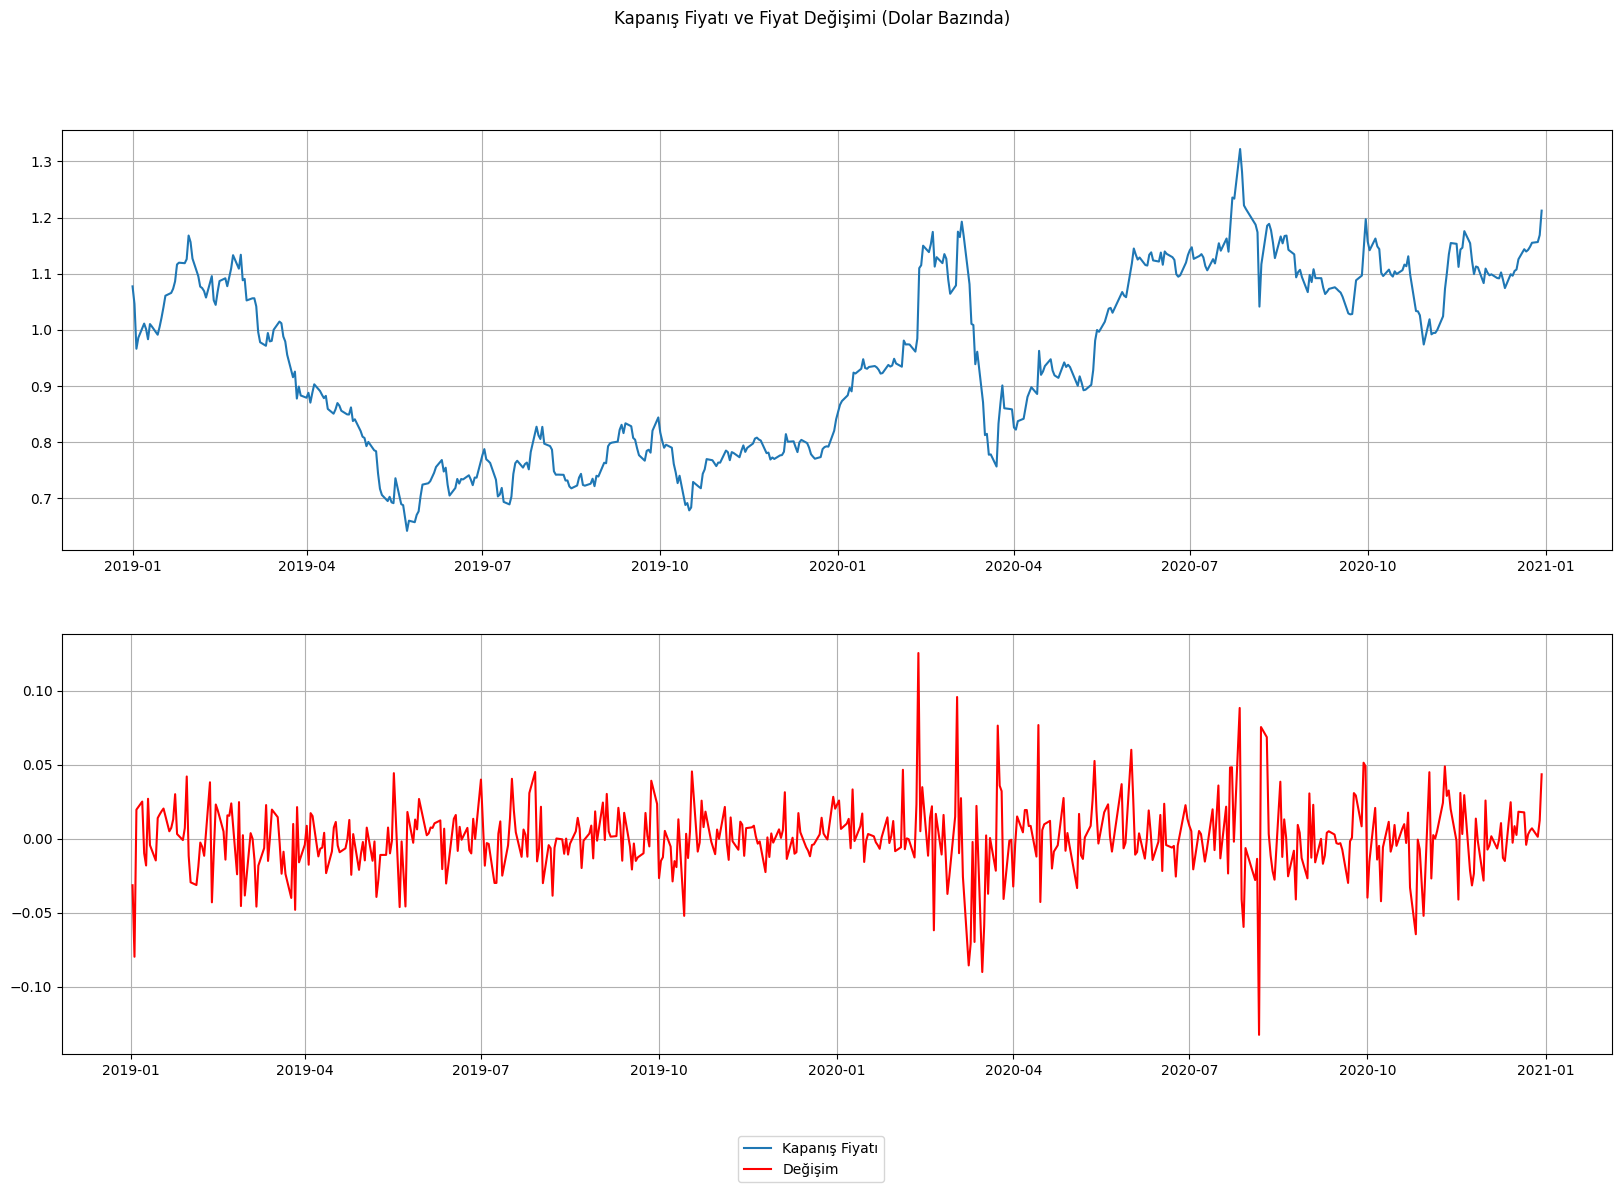

In [180]:
f = plt.figure(figsize=(20,12))
f.suptitle("Kapanış Fiyatı ve Fiyat Değişimi (Dolar Bazında)")
plt.subplot(211)
plt.plot(df["Close"],label="Kapanış Fiyatı")
plt.grid()

plt.subplot(212)
df["Return"]=df["Close"].diff() #günler arası değişimi bulabilmek için farkını alıyoruz.
plt.plot(df["Return"],label="Değişim",color ="r")

f.legend(loc="lower center")
plt.grid()
plt.show()

#### DEĞİŞİM Serisi fark aldığımız için DURAĞAN BİR SERİ. ADF testi ile bunu görebiliriz. eğer p value > 0.05 ise seri duragan değil demektir 
Verilerin zaman içinde yukarı ve aşağı eğilim olmamasına ortalama ve varyansının zaman içinde tutarlı olmasına denir. her zaman Serinin duragan olmasını isteriz seri duragan değil ise mutlaka duragan hale getirilmelidir ve bunu yapmanın bir kaç yolu vardır 

1) Trenden Arındırma: seride temel trendi hesaplayıp kaldırarak seriyi duragan hale getiririz
2) Fark alarak durağanlaştırma : bizim yaptığımız örnekte görebiliriz kur değişimini günler içinde farkını alarak seriyi duraganlaştırmak mümkündür.
3) Hareketli ortalama : zaman serisi kendi hareketli ortalamasının çıkarılmasıyla dönüştürülür. önceki her bir gözlemin değerinden önceki tüm gözlemlerin ortalaması çıkarılır. 
4) Logaritmik dönüştürme : serinin doğal logaritmasının kullanmasını ifade eder. genelde fark alındıktan sonra logaritması da alınarak durağanlaştırma yapılır. 

ARIMA modelleri verilerin DURAĞAN olduğunu yani doğrusal bir formatı takip ettiğini varsayar. 




In [181]:
print("Toplam pozitif getiri hisse başına: " ,sum(i for i in df["Return"] if i>0)) # pozitif farkları sırayla dönüp topluyor.
print("Toplam kayıp hisse başına: " ,sum(i for i in df["Return"] if i<0)) # negatif farkları sırayla dönüp topluyor.
print("Getirinin günlük fiyat değişminin en düşük getirisi: ",df["Return"].min())
print("Getirinin günlük fiyat değişminin en  yüksek getirisi: ",df["Return"].max())
print("Standart sapması: ",df["Return"].std())

Toplam pozitif getiri hisse başına:  4.341161895989759
Toplam kayıp hisse başına:  -4.206348458864053
Getirinin günlük fiyat değişminin en düşük getirisi:  -0.13234139171357473
Getirinin günlük fiyat değişminin en  yüksek getirisi:  0.12535329195584244
Standart sapması:  0.02426740898911662


### Finans piyasalarında bazı yaygın olarak kullanılan analizler vardır;

1. **Momentum (Awesome Oscillator):**
   - Awesome Osilatör, hisse senedi fiyat hareketinin momentumunu ölçmeye yardımcı olur.
   - Kısacası, fiyat hareketinin hızını ve gücünü değerlendirmek için kullanılır.
   - Verilere eklenmesinin nedeni, hisse senedi fiyatlarının hızını ve gücünü dikkate alarak işlem stratejileri geliştirmek veya analiz yapmak için kullanılabilmesidir.

2. **Volume (Chaikin Money Flow CMF):**
   - Chaikin Para Akışı (Chaikin Money Flow - CMF), bir hisse senedinin fiyat ve hacim hareketlerini birleştirerek para akışını değerlendiren bir göstergedir.
   - Hacmin fiyat hareketleri ile nasıl ilişkili olduğunu gösterir.
   - Verilere eklenmesinin nedeni, hacim ve para akışı ile ilgili bilgilerin fiyat hareketleri ile nasıl ilişkili olduğunu anlamak ve bu bilgilere dayalı işlem stratejileri geliştirmek içindir.

3. **Volatility (Average True Range ATR):**
   - Ortalama Gerçek Aralık (Average True Range - ATR), hisse senedinin oynaklığını ölçmeye yardımcı olur.
   - Yani, fiyatların ne kadar dalgalı olduğunu ve potansiyel riskleri değerlendirmeye yardımcı olur.
   - Verilere eklenmesinin nedeni, fiyat hareketlerinin oynaklığını anlamak ve risk yönetimi veya ticaret stratejileri için kullanabilmektir.

4. **Trend (Moving Average Convergence Divergence - MACD Signal):**
   - Hareketli Ortalama Yakınsama Sapması (Moving Average Convergence Divergence - MACD), bir hisse senedinin trendini ve momentumunu ölçmeye yardımcı olur.
   - Bu gösterge, hareketli ortalama çizgilerinin kesişimlerini ve bu kesişimlerin anlamını inceler.
   - Verilere eklenmesinin nedeni, hisse senedinin trendini belirlemek ve ticaret sinyalleri üretmek içindir.

Bu göstergelerin verilere eklenmesi, fiyat hareketleri, oynaklık, hacim ve trend hakkında daha fazla bilgi sağlamak ve bu bilgileri finansal analiz veya ticaret stratejileri oluşturmak için kullanmak amacıyla yapılır. Bu göstergeler, finansal piyasa analizinde yaygın olarak kullanılan araçlardır ve yatırımcıların kararlarını desteklemek için önemli bilgiler sunabilir.


In [182]:
import ta as ta 

# Momentum (Awesome Oscillator)
df["AO"] = ta.momentum.awesome_oscillator(df["High"], df["Low"])

#Volume ( Chaikin Monet Flow CMF)
df["CMF"] = ta.volume.chaikin_money_flow(df["High"],df["Low"],df["Close"],df["volume"],fillna=True)

#Volatility ( Average True Range ATR )
df["ATR"] = ta.volatility.average_true_range(df["High"],df["Low"],df["Close"],fillna=True)

# Trend (Moving Average Convergence Divegence (MACD signal)
df["MACDsignal"] = ta.trend.macd_signal(df["Close"],fillna=True)

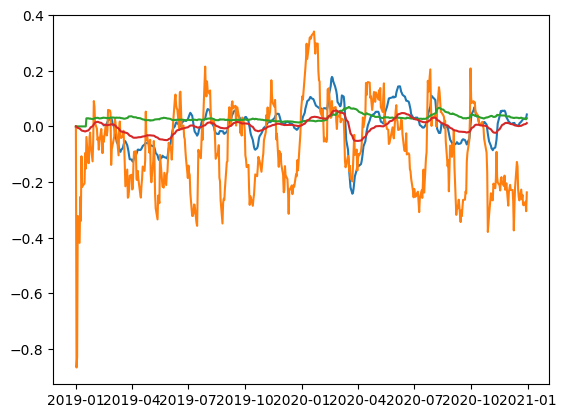

In [183]:
plt.plot(df[["AO","CMF","ATR","MACDsignal"]])
plt.show()

In [184]:
df.replace(0,df.mean(axis=0),inplace=True) # 0 değerleri ort ile dolduruyoruz.

In [185]:
from statsmodels.tsa.stattools import adfuller
df2 = df 
adf_results ={}

df2 = df2.replace([np.inf, -np.inf], np.nan).dropna() # adf testi hazırlığı için veri içinden sonsuz ve nan değerleri çıkartıyoruz 


for col in df2.columns.values:
    adf_results[col] = adfuller(df2[col]) #df içinde her sütün için sırasıyla adf testi yapıyoruz 

adf_results = pd.DataFrame(adf_results).T
adf_results["Durağan"] = np.where(adf_results[1]>0.05,"Değil","Durağan") # dict içinde durağan isimli sütün ekliyoruz eğer sonuç 0.05 büyük ise değil yaz diyoruz. else ise duragan. 
print(adf_results["Durağan"]) 

Open            Değil
High            Değil
Low             Değil
Close           Değil
volume        Durağan
Return        Durağan
AO            Durağan
CMF           Durağan
ATR             Değil
MACDsignal    Durağan
Name: Durağan, dtype: object


### Göründüğü gibi fark almamız sonucu oluşan Return durağan iken Close durağan değildir.

Tüm öznitelikler istenilen düzeyde durağandır artık bundan sonra Return serisi üzerinden fiyat değişimi üzerinden ilerleyeceğiz.



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


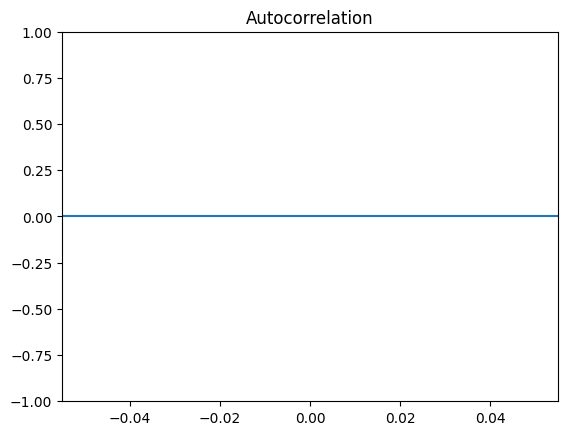

In [192]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df["Return"])
plt.show()
# Görülüdüğü üzere Return için otokorelasyon çok zayıf olduğu için düz bir çizgi elde ediyoruz. gecikmeli değerlerini modele dahil etmemie gerek yok 

### Çoklu doğrusal bağlantı için VIF testi 


Bir regresyon modelinde iki veya daha fazl öznitelik değiişkenin birbiri ile yüksek oranda korelasyona sahip olmasını istemeyiz linear algoritmalarda heatmap ile 

korelasyon haritasına bakabiliriz ve korelasyon olan değerlerden birini atarız buna örnek olarak otelin ziyaretçi sayısını tahmin eden modelde sıcaklık değeri hem

fahrenheit hem santigrat olarak var ise bunlardan birini atmalıyız zaman serisi problemlerinde bunu VIF değerine bakarak anlarız VIF değerinin 10dan fazla olması

o özniteliğin çoklu doğrusal bağlantı sorunu olduğunu gösterir.

In [194]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
df2 = df.replace([np.inf, -np.inf], np.nan).dropna() # sonsuz ve nan değerleri çıkarıyoruz.

Xx = df2[["Return","AO","CMF","ATR","MACDsignal"]] 

vif_data["Feature"] = Xx.columns

vif_data["VIF"] = [variance_inflation_factor(Xx.values,i)for i in range(len(Xx.columns))]

print(vif_data)

      Feature       VIF
0      Return  1.023301
1          AO  4.418542
2         CMF  1.469867
3         ATR  1.215667
4  MACDsignal  4.089068


### ACPR PLOT TESTİ 

Doğrusallık varsayımı testi özniteliklerin hedef değişken ile doğrusal bir ilişki içinde olmasını isteriz. Basit regresyon doğrusu ile lowess eğrisi

karşılaştırılır basit regresyon doğrusunun lowess eğrisi(kırmızı) ile örtüşmesi istenir.

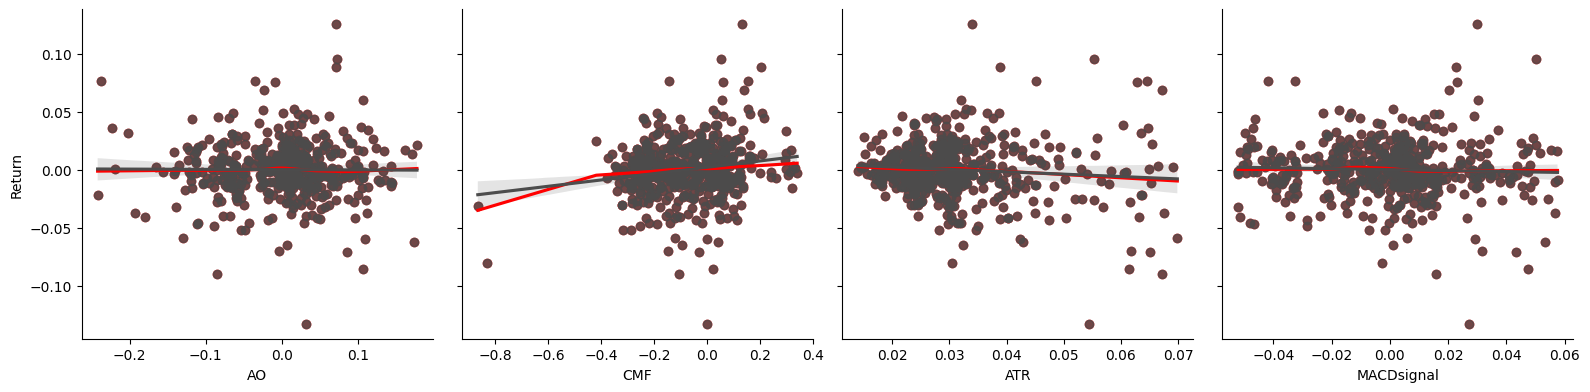

In [195]:
g = sns.PairGrid(df,y_vars=["Return"],x_vars=["AO","CMF","ATR","MACDsignal"],height=4)

g.map(sns.regplot,lowess=True,color="r")
g.map(sns.regplot,lowess=False,color=".3")

# CMF - Return grafiğinde bir miktar uyumsuzluk bulunur 

In [207]:
# Öznitelik değişkenleri
#shift(1)' ifadesi, 'Close' sütunundaki değerleri bir zaman birimi (gün) geriye kaydırır. 
#her günün kapanış fiyatının bir önceki günün kapanış fiyatına göre ne kadar değiştiğini hesaplamak istiyorsak, shift fonksiyonunu kullanabiliriz. 
X = df[["AO","CMF","ATR","MACDsignal"]].shift(1) # t-1 değeri
X = X.fillna(X.mean()) # nan değerleri ort ile dolduruyoruz

y= df["Return"] # t değeri
y.fillna(y.mean(), inplace=True) 

In [205]:
# zaman serisi çapraz doğrulama performansı Finans verileri açısından en uygun olan çapraz doğrulama yöntemi : GapWalkForward #######
#n_splits = eğitim setini 5 gruba ayırır gap_size = eğitim ve test seti arasında boşluk bırakma test_size = 5de 1 test olsun. 
from tscv import GapWalkForward 

cv = GapWalkForward(n_splits=5,gap_size=0,test_size=1) 
for train_cv,test_cv in cv.split(range(10)):
    print("train_cv: ",train_cv,"test_cv: ",test_cv)

train_cv:  [0 1 2 3 4] test_cv:  [5]
train_cv:  [0 1 2 3 4 5] test_cv:  [6]
train_cv:  [0 1 2 3 4 5 6] test_cv:  [7]
train_cv:  [0 1 2 3 4 5 6 7] test_cv:  [8]
train_cv:  [0 1 2 3 4 5 6 7 8] test_cv:  [9]


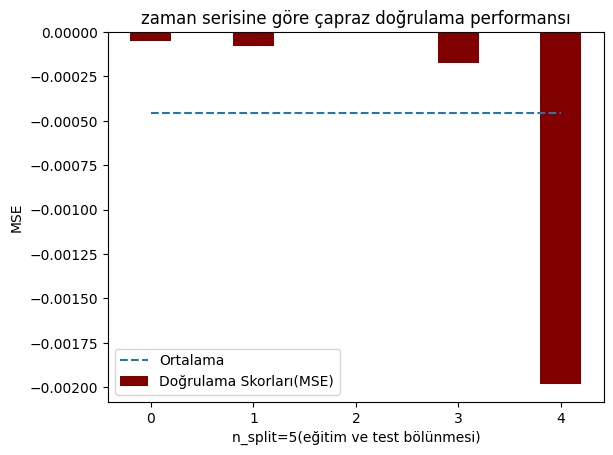

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

scores = cross_val_score(lr,X,y,scoring="neg_mean_squared_error",cv=cv) 

split_no = np.arange(len(scores)) # scores listesi 5 elemana sahipse, split_no şu şekilde olur: [0, 1, 2, 3, 4].

mean = [np.mean(scores)]*len(scores) # scores listesinin ortalaması 0.1 ise ve scores listesi 5 elemana sahipse, mean şu şekilde olur: [0.1, 0.1, 0.1, 0.1, 0.1]
# bu sayede mean tüm katmanlar için aynı kalıyor (kesik mavi çizgi) 

fig,ax = plt.subplots()

plt.title("zaman serisine göre çapraz doğrulama performansı")

bar = ax.bar(split_no,scores,label="Doğrulama Skorları(MSE)",color="maroon",width=0.4)

mean_line = ax.plot(split_no,mean,label="Ortalama",linestyle="--")
legend = ax.legend(loc="best")
plt.xlabel("n_split=5(eğitim ve test bölünmesi)")
plt.ylabel("MSE")

plt.show()

   ##### Bu sayede her katmanın skoru ile ortalama skor karşılaştırılabilir ve modelin performansının nasıl bir dağılım gösterdiğini görebiliriz #####

#### Çapraz Doğrulama Sonucu Gördük ki;

Veri seti büyüdükçe hata skoru da değişmektedir her dilim için Mse ve ort Mse kıyaslarsak standart sapmasının büyük olduğunu görebiliriz. Tüm bunlar veri setine

bağlı YANLILIK sorununu işaret eder. Normalde veri seti büyüdükçe model verileri daha iyi öğrenip onu taklit edeceğini burada modelin hata skorunda istikrarlı

bir düşüş yok

Bir modelin hatasının iki temel bileşeni vardır Yanlılık ve Varyans bunlar modelin optimizasyonu ile düşürülebilir bir de düşürülemen hata vardır (irreducible error ) vardır. 

MSE = Varyans + Yanlılık karesi + Düşürülemeyen hata

Modelin veri setine duyarlılığı öğrenme performansı için ne kadar veri setine ihtiyaç duyduğu hata performansını anlamak  için önemlidir bu sebep ile çapraz doğrulama yaptık.

In [209]:
train_size = int(len(X)*0.80) # verinin % 80 ayırıyoruz.

train,test = X[0:train_size],X[train_size:len(X)] 

print("Gözlem sayısı: %d" %(len(X))) 
print("Eğitim seti gözlem sayısı: %d" %(len(train)))
print("Test seti gözlem sayısı: %d" %(len(test)))


Gözlem sayısı: 510
Eğitim seti gözlem sayısı: 408
Test seti gözlem sayısı: 102


In [210]:
X_train = X[0:train_size].values
Y_train = y[0:train_size].values 
X_test = X[train_size:].values
Y_test = y[train_size:].values 

### Yanlılık ve Varyans ayrıştırma fonksiyonu 

MSE = Varyans + Yanlılık karesi + Düşürülemeyen hatanın ne kadarının varyans ne kadarının düşürülemeyen hata olduğunu anlamalıyız

In [212]:
from mlxtend.evaluate import bias_variance_decomp 

ort_hata,ort_bias,ort_var = bias_variance_decomp(lr,X_train,Y_train,X_test,Y_test,loss="mse",random_seed=42)

print("Ortalama hata: %5f" % (ort_hata))
print("Ortalama Yanlılık: %5f" % (ort_bias))
print("Ortalama Varyans: %5f" % (ort_var))

Ortalama hata: 0.000547
Ortalama Yanlılık: 0.000532
Ortalama Varyans: 0.000015


Modelin hatası yanlılıktan kaynaklanmaktadır Çapraz doğrulama sonucu ulaştığımız bilgiyi teyit etmiş olduk. 

Bu veri seti ile alakalıdır modelin ne kadar veriye ihtiyacı vardır bunu Öğrenme Eğrisi ile görebiliriz.

In [213]:
from sklearn.model_selection import learning_curve

train_sizes = len(X) # öğrenme setinin uzunluğu kaç gözlem var ? 

train_sizes,train_scores,test_scores = learning_curve(lr,X,y,cv=5,scoring="neg_mean_squared_error")

train_mean = np.mean(-train_scores,axis=1)
test_mean = np.mean(-test_scores,axis=1) # çapraz doğrulama skoru

### Learning_curve fonksiyonu ile;

Bir makine öğrenimi modelinin performansını eğitim verisi ve test verisi üzerinde çapraz doğrulama ile değerlendirmek için kullanılır.

*** train_scores: Bu dizi, eğitim verileri üzerinde yapılan eğitim işlemi sırasında elde edilen her bir öğrenme puanını içerir. Her öğrenme puanı, farklı eğitim
verisi büyüklükleri için hesaplanır. Yani, bu dizi eğitim verisi büyüklüğüne bağlı olarak modelin ne kadar iyi öğrendiğini gösterir. Her öğrenme puanı, belirli bir eğitim verisi büyüklüğüne karşılık gelir.

*** test_scores: Bu dizi, test verisi üzerinde yapılan değerlendirme işlemi sırasında elde edilen her bir test puanını içerir. Her test puanı, farklı eğitim verisi büyüklükleri için hesaplanır. Bu dizi, modelin eğitildiği eğitim verisi dışındaki verilere karşı ne kadar iyi genelleme yaptığını gösterir. Her test puanı, belirli bir eğitim verisi büyüklüğüne karşılık gelir. cross_val_score() fonksiyonu ile daha öncesinde yukarıda yaptık.

/var/folders/xp/gs5jj49d2n1_y881z2h8pqmm0000gn/T/ipykernel_60036/1569801005.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


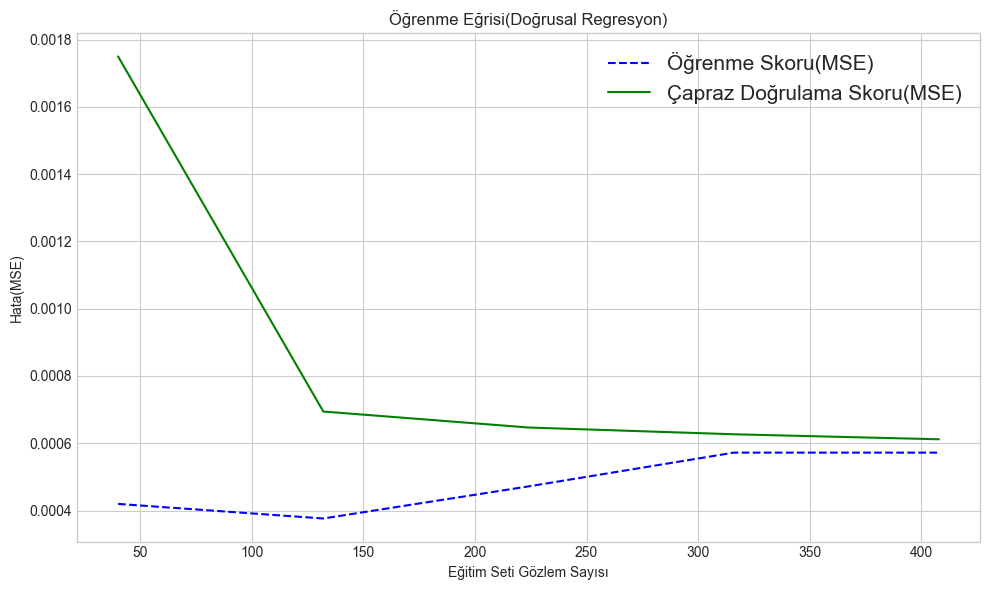

In [214]:
plt.figure(figsize=(10,6))
plt.style.use("seaborn-whitegrid")

plt.plot(train_sizes,train_mean,"--",color="b",label="Öğrenme Skoru(MSE)")
plt.plot(train_sizes,test_mean,color="g",label="Çapraz Doğrulama Skoru(MSE)")

plt.title("Öğrenme Eğrisi(Doğrusal Regresyon)")
plt.xlabel("Eğitim Seti Gözlem Sayısı")
plt.ylabel("Hata(MSE)")
plt.legend(loc="best",fontsize=15)
plt.tight_layout()
plt.show()


### Learning curve grafiği ile;

train seti az sayıda gözleme sahip olduğunda hedef değişkeni (dolar getirisini (return)) az hata ile tahmin ediyor ancak doğrulama skorunda gözlem sayısı arttıkça

hata aniden düşüyor gözlem sayısı arttıkça algortima daha iyi modeller üretiyor öğrenme setindeki hedef değişkeni daha yüksek hata ile tahmin ederken (gözlem

sayısı 150-300 arası) doğrulama setindeki hedef değişkeni daha az hata ile tahmin etmeye başlıyor.

Gözlem sayısı 300e ulaşınca doğrulama seti hatası daha stabil hale geliyor. daha çok veri ile beslemek modelin performansını iyileştirmeye yetmiyor.

Modele daha çok veri vermek yerine daha çok öznitelik eklemek daha faydalı olabilir ama modelin karmaşıklığını arttırmış oluruz. 

Model içinde yanlılık sorunu olduğunun temel göstergesi öğrenim skorunun hatasının yüksek olmasıdır MSE 0.003 civarında seyretmektedir (mse karesi alınmış rakam olduğundan karekök almamız lazım) 0.003 karekökü 0.05 yani 5 cent hatadır. türk lirası bazında bu günlük hisse piyasası için büyük bir sapmadır. 

300 gözlem sonrasında iki eğri arasında fark oluşmamaktadır o fark artık düşürülemeyen farktır. 


In [215]:
lr.fit(X,y)
df["y_pred"] = lr.predict(X)
# tahmin edilen ve gerçek Fiyat değişimini görelim
print(df[["Return","y_pred"]].head(10))
print(df[["Return","y_pred"]].tail(10))

              Return    y_pred
2019-01-01  0.000265  0.000265
2019-01-02 -0.031364  0.000496
2019-01-03 -0.079632 -0.004336
2019-01-04  0.019639 -0.004223
2019-01-07  0.025115 -0.001281
2019-01-08 -0.009796 -0.001992
2019-01-09 -0.018029 -0.001111
2019-01-10  0.026994 -0.001754
2019-01-11 -0.004332 -0.000443
2019-01-14 -0.014638 -0.001183
              Return    y_pred
2020-12-17  0.002594 -0.000503
2020-12-18  0.018246 -0.000348
2020-12-21  0.017807 -0.000856
2020-12-22 -0.004066 -0.001471
2020-12-23  0.002954 -0.001489
2020-12-24  0.005531 -0.001112
2020-12-25  0.007049 -0.001159
2020-12-28  0.001344 -0.000987
2020-12-29  0.012388 -0.000409
2020-12-30  0.043507 -0.000605


In [216]:
from sklearn.metrics import mean_squared_error as mse
print("MSE: ",mse(df["Return"],df["y_pred"])) # model hata performansı 
print("r2: ",lr.score(X,y)) # model performansı 


MSE:  0.0005757883867244861
r2:  0.018427130847603057


#### Learning curve grafiğini;

VARYANS açısından incelersek doğrulama skoru ile öğrenme scoru arasındaki fark azaldıkça varyans azalır demektir. iki öğrenme eğrisi arasındaki fark azalarak stabil hale geldiği için modelin varyans sorunu yoktur yani model train ile öğrenme setinde iyi performans göstermisse test seti doğrulama seti için de iyi performans göstericektir.

Eğer gözlem sayısı arttıkça doğrulama setinin hatası düşüyor fakat öğretim setinin hata skoru ile arasındaki fark büyükse modelin yüksek varyansı var demektir ama bu model için böyle değildir. bunun çözümlerinden bir tanesi modeli daha fazla öğrenme verisi ile eğitmektir. 

Artık Fiyat tahmini yapalım !!

### Hisse senedinin yarın ki fiyatı ne olacak ??

Yukarıda incelediğimiz şekilde model ertesi gün fiyat değişimini iyi yapamakta ve 5 centlik hata yapmaktadır bu hisse piyasaları için büyük bir farktır.

Başka bir yaklaşımla devam edeceğiz..

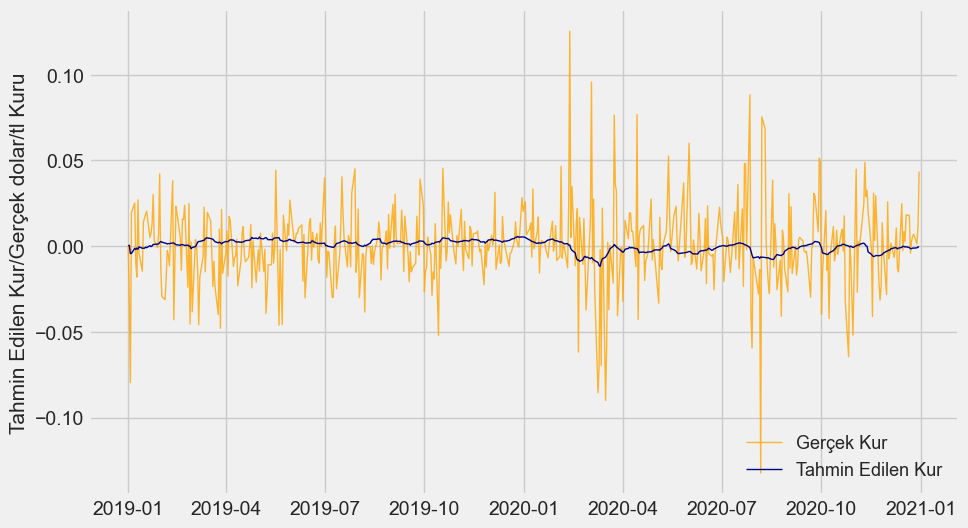

In [218]:
df["Date"] = df.index
plt.figure(figsize =(10,6))
plt.style.use("fivethirtyeight")

plt.plot(df["Date"],df["Return"],alpha=0.8,linestyle="-",color="orange",lw=1,label="Gerçek Kur")
plt.plot(df["Date"],df["y_pred"],alpha=1,linestyle="-",color="navy",lw=1,label="Tahmin Edilen Kur")

plt.ylabel("Tahmin Edilen Kur/Gerçek dolar/tl Kuru",fontsize=15)
plt.legend(fontsize=13,loc="lower right")
plt.show()

### Zaman serisi modeli oluşturmadan geçmiş veriler ile kapanış fiyatı tahmini ;

t zamanda df["close"] değerinden yola çıkara fiyat değişiminin ya da hisse senedi getirisinin t + 1 zamanda olan değerine t zamanında olan kapanış fiyatını

eklersek t + 1 zamanının tahmini kapanış fiyatını buluruz.

!!! Kapanış fiyatına (close), 'y_pred' (tahmin ettiğimiz return(fiyat değişimini)) eklersek bir sonraki günün Kapanış fiyatını buluruz 

değişim( t+1 ) = a + Bx

fiyat ( t+1 ) = fiyat (t ) + değişim( t+1 ) 




In [219]:
df["Pred_Price"] = df["Close"].shift(1) + df["y_pred"] # bir gün sonrası için kapanış tahmini dikkat ! return değil 

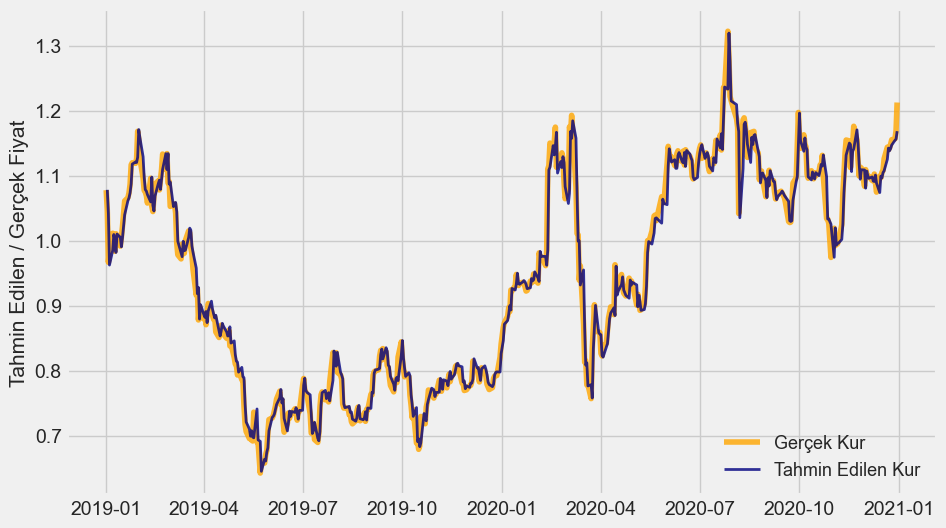

In [222]:
df["Date"] = df.index
plt.figure(figsize =(10,6))
plt.style.use("fivethirtyeight")

plt.plot(df["Date"],df["Close"],alpha=0.8,linestyle="-",color="orange",lw=4,label="Gerçek Kur")
plt.plot(df["Date"],df["Pred_Price"],alpha=0.8,linestyle="-",color="navy",lw=2,label="Tahmin Edilen Kur")

plt.ylabel("Tahmin Edilen / Gerçek Fiyat",fontsize=15)
plt.legend(fontsize=13,loc="lower right",)

plt.show()


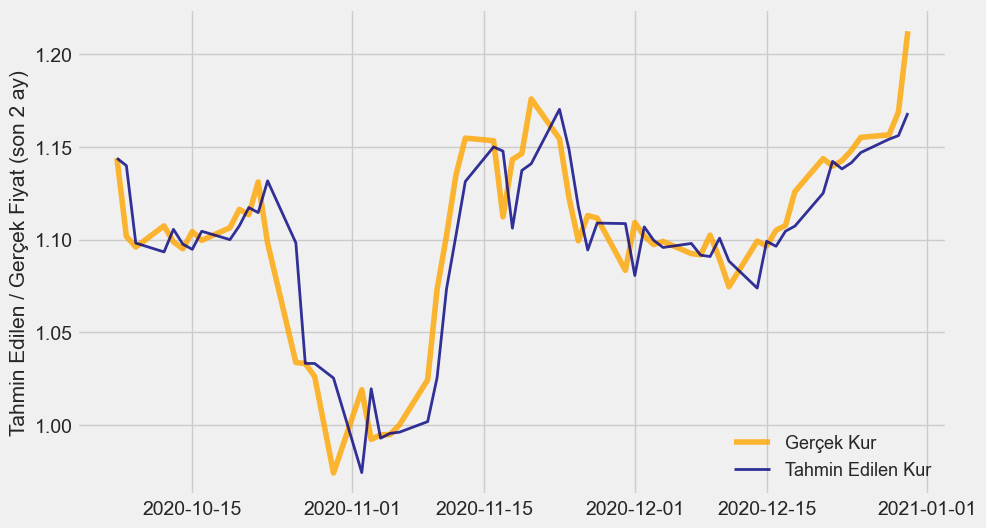

In [225]:
df["Date"] = df.index
plt.figure(figsize =(10,6))
plt.style.use("fivethirtyeight")

plt.plot(df["Date"][450:],df["Close"][450:],alpha=0.8,linestyle="-",color="orange",lw=4,label="Gerçek Kur")
plt.plot(df["Date"][450:],df["Pred_Price"][450:],alpha=0.8,linestyle="-",color="navy",lw=2,label="Tahmin Edilen Kur")

plt.ylabel("Tahmin Edilen / Gerçek Fiyat (son 2 ay)",fontsize=15)
plt.legend(fontsize=13,loc="lower right",)

plt.show()


### İleri tarihe yönelik tahmin

Veri son işlem günü 30 aralık 2021 biz 31 aralık 2020 kapanışş fiyatını tahmin edelim

In [239]:
from yahoo_fin.stock_info import * # hisse senedi verilerine erişmek için 

t1 = get_data("ASELS.IS","2020-12-30","2021-01-01",index_as_date=True) # 31 aralık aselsan hisse senet fiyatını çekiyoruz.



In [240]:
t1.head()

,open,high,low,close,adjclose,volume,ticker
2020-12-30,8.970,9.455,8.965,9.220,8.957716,254683148,ASELS.IS
2020-12-31,9.205,9.240,9.095,9.165,8.904281,66814456,ASELS.IS


In [241]:
t1 = t1.drop(["open","high","low","adjclose","volume","ticker"],axis=1)

In [242]:
USD1 = get_data("USDTRY=X","2020-12-30","2021-01-01",index_as_date = True) # o tarih dolar kurunu çekiyoruz
ppp = t1["close"] / USD1["close"] # dolar bazından kapanış fiyatı 


In [243]:
AO,CMF,ATR,MACDsignal = df ["AO"][-1],df["CMF"][-1],df["ATR"][-1],df["MACDsignal"][-1]
# 30 aralık 2020 öznitelik değişkenlerinden yola çıkarak 31 aralık dolar bazlı fiyat değişimini tahmin edelim 

In [249]:
# 31-12-2020 işlem gününü tahmin edelim.

print("Bir gün sonraki değişim tahmini(dolar): ", lr.predict([[AO,CMF,ATR,MACDsignal]]))

print("Bir gün sonraki kapanış fiyatı tahmini(dolar): ", df["Close"][-1] + lr.predict([[AO,CMF,ATR,MACDsignal]]))

print("Hisse senedinin bir gün sonraki kapanış fiyatu : ",ppp[1])

Bir gün sonraki değişim tahmini(dolar):  [-0.0017517]
Bir gün sonraki kapanış fiyatı tahmini(dolar):  [1.21058533]
Hisse senedinin bir gün sonraki kapanış fiyatu :  1.242925864499442


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [248]:
ppp #ppp[1] 

2020-12-30    1.247835
2020-12-31    1.242926
2021-01-01         NaN
Name: close, dtype: float64

#### Hisse senedinin dolar bazında tahmin edilen değeri 1.21$ hisse senedinin gerçeklesen değeri ise 1.24$ 